# Importacion de librerias

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

In [2]:
from gradiente import *
from utilities import *

# Lectura de CSV

In [3]:
dataset = pd.read_csv('Admission_Predict.csv', usecols=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Chance of Admit'])
dataset.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
0,337,118,4,4.5,4.5,9.65,0.92
1,324,107,4,4.0,4.5,8.87,0.76
2,316,104,3,3.0,3.5,8.00,0.72
3,322,110,3,3.5,2.5,8.67,0.80
4,314,103,2,2.0,3.0,8.21,0.65


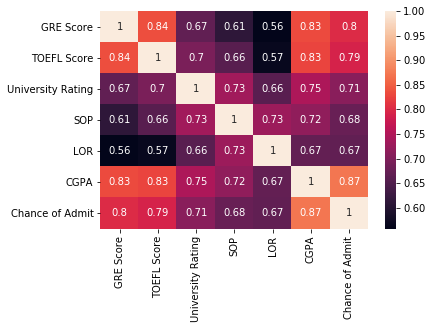

In [4]:
sb.heatmap(dataset.corr(), annot=True)

In [5]:
data = dataset.iloc[:len(dataset), 0:7].values
training, cv, test = getPartitions(data, 0.6, 0.2)

La variables que se utilizarán serán GRE Score, TOEFL Score, CGPA.

# Chance of Admit

In [286]:
y = training[:len(training), 6].reshape(-1,1)

# GRE Score

In [23]:
gre = training[:len(dataset), 0].reshape(-1, 1)

In [24]:
a = np.insert(gre, 0, 1, axis=1)
X = np.hstack((a, gre**2/100))
m, n = X.shape
theta_0 = np.random.rand(n, 1)

In [25]:
theta, costs, gradient_norms = gradient_descent (
    X,
    y,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    alpha=0.0000001,
    treshold=0.01,
    max_iter=1000000
)

In [26]:
formula = ""
for i in range(len(theta) - 1,  -1, -1):
    if theta[i][0] >= 0:
        formula = " + " + str(theta[i][0]) + " * x^" + str(i) + formula
    else:
        formula = str(theta[i][0]) + " * x^" + str(i) + formula

Text(0.5, 1.0, '$y= + 0.626096235387626 * x^0-0.010309974269869293 * x^1 + 0.0033164752218593787 * x^2$')

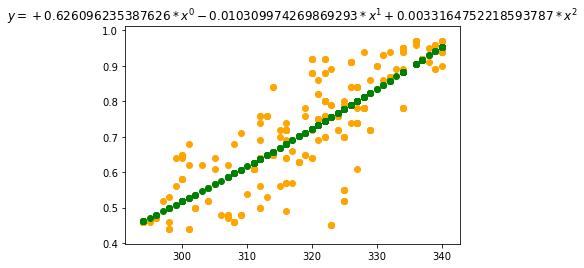

In [27]:
plt.scatter(X[:,1], y, color='orange')
plt.scatter(X[:, 1], np.matmul(X, theta), color='green')
plt.title('$y=%s$'%formula)

In [7]:
print("THETA:", "y= + 0.626096235387626 * x^0-0.010309974269869293 * x^1 + 0.0033164752218593787 * x^2")

THETA: y= + 0.626096235387626 * x^0-0.010309974269869293 * x^1 + 0.0033164752218593787 * x^2


# TOEFL Score

In [293]:
toefl = training[:len(dataset), 1].reshape(-1, 1)

In [294]:
a = np.insert(toefl, 0, 1, axis=1)
X = np.hstack((a, toefl**2/4000, toefl**3/1000000))
m, n = X.shape
theta_0 = np.random.rand(n, 1)

In [295]:
theta, costs, gradient_norms = gradient_descent (
    X,
    y,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    alpha=0.0000001,
    treshold=0.01,
    max_iter=1000000
)

ValueError: too many values to unpack (expected 3)

In [ ]:
formula = ""
for i in range(len(theta) - 1,  -1, -1):
    if theta[i][0] >= 0:
        formula = " + " + str(theta[i][0]) + " * x^" + str(i) + formula
    else:
        formula = str(theta[i][0]) + " * x^" + str(i) + formula

In [ ]:
plt.scatter(X[:,1], y, color='orange')
plt.scatter(X[:, 1], np.matmul(X, theta), color='green')
plt.title('$y=%s$'%formula)

In [ ]:
print("THETA:", "y= + 0.17983229396047745 * x^0-0.01566583740557145 * x^1 + 0.4367159299577735 * x^2 + 0.7256448006217592 * x^3")

# CPGA

In [33]:
cgpa = training[:len(dataset), 5].reshape(-1, 1)

In [34]:
a = np.insert(cgpa, 0, 1, axis=1)
X = np.hstack((a, cgpa**2/25))
m, n = X.shape
theta_0 = np.random.rand(n, 1)

In [35]:
theta, costs, gradient_norms = gradient_descent (
    X,
    y,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    alpha=0.000001,
    treshold=0.01,
    max_iter=100000
)

In [36]:
formula = ""
for i in range(len(theta) - 1,  -1, -1):
    if theta[i][0] >= 0:
        formula = " + " + str(theta[i][0]) + " * x^" + str(i) + formula
    else:
        formula = str(theta[i][0]) + " * x^" + str(i) + formula

Text(0.5, 1.0, '$y= + 0.43563083339360853 * x^0-0.06413573431615059 * x^1 + 0.27811791360597776 * x^2$')

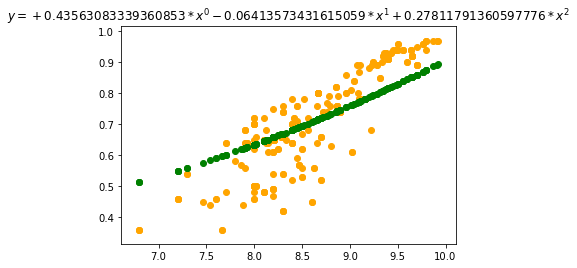

In [37]:
plt.scatter(X[:,1], y, color='orange')
plt.scatter(X[:, 1], np.matmul(X, theta), color='green')
plt.title('$y=%s$'%formula)

In [38]:
print("THETA:", "y= + 0.43563083339360853 * x^0-0.06413573431615059 * x^1 + 0.27811791360597776 * x^2")

THETA: y= + 0.43563083339360853 * x^0-0.06413573431615059 * x^1 + 0.27811791360597776 * x^2


# Opción 1. Juntar las variables GRE-Score, TOEFL-Score y CPGA con multiplicación.

In [39]:
gre = training[:len(dataset), 0].reshape(-1, 1)
toefl = training[:len(dataset), 1].reshape(-1, 1)
cgpa = training[:len(dataset), 5].reshape(-1, 1)

In [21]:
a = np.insert(gre*toefl*cgpa/10000, 0, 1, axis=1)
X = np.hstack((a, ((gre*toefl*cgpa)**2)/100000000000))
m, n = X.shape
theta_0 = np.random.rand(n, 1)

In [22]:
theta, costs, gradient_norms = gradient_descent (
    X,
    y,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    alpha=0.00000001,
    treshold=0.01,
    max_iter=10000000
)

In [23]:
formula = ""
for i in range(len(theta) - 1,  -1, -1):
    if theta[i][0] >= 0:
        formula = " + " + str(theta[i][0]) + " * x^" + str(i) + formula
    else:
        formula = str(theta[i][0]) + " * x^" + str(i) + formula

Text(0.5, 1.0, '$y= + 0.35003060943440834 * x^0-0.009371913628722302 * x^1 + 0.6829739924393133 * x^2$')

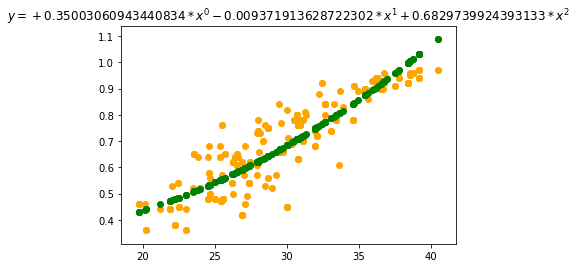

In [24]:
plt.scatter(X[:,1], y, color='orange')
plt.scatter(X[:, 1], np.matmul(X, theta), color='green')
plt.title('$y=%s$'%formula)

In [20]:
print("THETA:", "y= + 0.2271756246514102 * x^0 + 0.005792849180837182 * x^1 + 0.3412698664466752 * x^2")

THETA: y= + 0.2271756246514102 * x^0 + 0.005792849180837182 * x^1 + 0.3412698664466752 * x^2


# Opción 2. Juntar las variables GRE-Score, TOEFL Score y CGPA a través de columnas.

## Análisis de variables

In [298]:
gre_training = training[:len(training), 0].reshape(-1, 1)
toefl_training = training[:len(training), 1].reshape(-1, 1)
cgpa_training = training[:len(training), 5].reshape(-1, 1)

In [299]:
ones = np.ones(len(training)).reshape(-1, 1)
X = np.hstack(
    (
        ones,
        (gre_training**2)/100,
        (toefl_training**3)/1000,
        cgpa_training**4/10
    )
)
m, n = X.shape
theta_0 = np.random.rand(n, 1)

[[0.35298131]
 [0.04854828]
 [0.49673132]
 [0.27284016]]


In [300]:
y = training[:len(training), 6].reshape(-1,1)

In [301]:
theta = gradient_descent (
    X,
    y,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    alpha=0.0000001,
    treshold=0.01,
    max_iter=10000000
)
print(theta)

[[ 3.53072966e-01]
 [-2.16983446e-04]
 [ 1.82370771e-04]
 [ 6.24570215e-04]]


In [302]:
formula = ""
for i in range(len(theta) - 1,  -1, -1):
    if theta[i][0] >= 0:
        formula = " + " + str(theta[i][0]) + " * x^" + str(i) + formula
    else:
        formula = str(theta[i][0]) + " * x^" + str(i) + formula

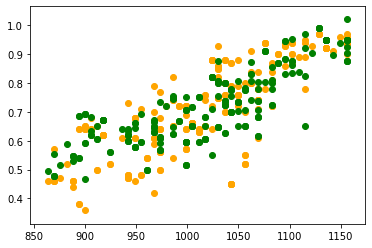

In [305]:
plt.scatter(X[:, 1], y, color='orange')
plt.scatter(X[:, 1], np.matmul(X, theta), color='green')

## Regularizando la función... (con cross validation)

In [306]:
gre_cv = cv[:len(cv), 0].reshape(-1, 1)
toefl_cv = cv[:len(cv), 1].reshape(-1, 1)
cgpa_cv = cv[:len(cv), 5].reshape(-1, 1)
y = cv[:len(cv), 6].reshape(-1,1)

In [307]:
ones = np.ones(len(cv)).reshape(-1, 1)
X = np.hstack(
    (
        ones,
        (gre_cv**2)/100,
        (toefl_cv**3)/1000,
        (cgpa_cv**4)/10
    )
)
print(theta_0)

[[ 3.53072966e-01]
 [-2.16983446e-04]
 [ 1.82370771e-04]
 [ 6.24570215e-04]]


In [308]:
theta0 = theta_0
theta = gradient_descent_reg (
    X,
    y,
    theta0,
    linear_cost_regularizado,
    linear_cost_derivate_regularizado,
    lambdaa=2,
    alpha=0.00000001,
    treshold=0.01,
    max_iter=100000
)
print(theta)

[[ 3.53066850e-01]
 [-2.01680960e-04]
 [ 1.78783412e-04]
 [ 6.33353374e-04]]


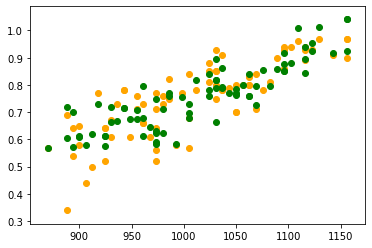

In [316]:
plt.scatter(X[:, 1], y, color='orange')
plt.scatter(X[:, 1], np.matmul(X, theta), color='green')

## Verificando el modelo con test

In [325]:
print("THETA:\n", theta)

THETA:
 [[ 3.53066850e-01]
 [-2.01680960e-04]
 [ 1.78783412e-04]
 [ 6.33353374e-04]]


In [318]:
gre_test = test[:len(test), 0].reshape(-1, 1)
toefl_test = test[:len(test), 1].reshape(-1, 1)
cgpa_test = test[:len(test), 5].reshape(-1, 1)
y_test = test[:len(test), 6].reshape(-1,1)

In [319]:
ones = np.ones(len(cv)).reshape(-1, 1)
X = np.hstack(
    (
        ones,
        (gre_test**2)/100,
        (toefl_test**3)/1000,
        (cgpa_test**4)/10
    )
)

### Predicción de GRE Score

Text(0.5, 1.0, 'Prediccion de Gre Score')

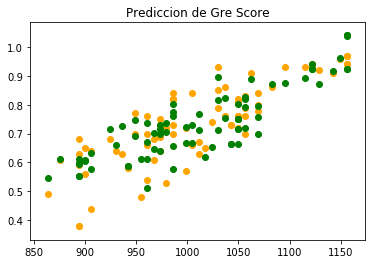

In [320]:
plt.scatter(X[:, 1], y_test, color='orange')
plt.scatter(X[:, 1], np.matmul(X, theta), color='green')
plt.title("Prediccion de Gre Score")

### Predicción de TOEFL Score

Text(0.5, 1.0, 'Prediccion de TOEFL Score')

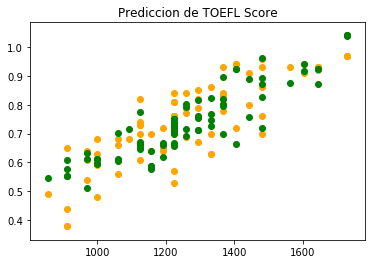

In [323]:
plt.scatter(X[:, 2], y_test, color='orange')
plt.scatter(X[:, 2], np.matmul(X, theta), color='green')
plt.title("Prediccion de TOEFL Score")

### Predicción de CGPA

Text(0.5, 1.0, 'Prediccion de CGPA')

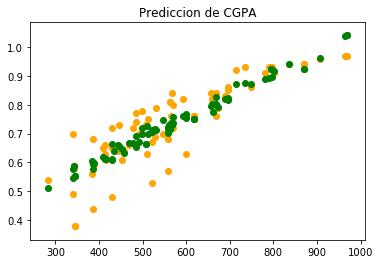

In [324]:
plt.scatter(X[:, 3], y_test, color='orange')
plt.scatter(X[:, 3], np.matmul(X, theta), color='green')
plt.title("Prediccion de CGPA")

In [321]:
ecm(np.matmul(X, theta), y_test)

0.004292963303372507

In [322]:
print('El coeficiente de correlacion es:\n',(((y_test-y_test.mean())**2).sum()-((np.matmul(X, theta)-y_test)**2).sum())/((y_test-y_test.mean())**2).sum())

El coeficiente de correlacion es:
 0.7816672999455336


## En conclusión...

Al analizar la opción 1 y la opción 2, se consider que la **opción 2** es mejor que la opción 1. Pues, visualmente se observa que es capaz de predecir de mejor forma.

Además, el modelo que se utilizó consta de que theta tenga el siguiente valor: [[ 3.53066850e-01]
 [-2.01680960e-04]
 [ 1.78783412e-04]
 [ 6.33353374e-04]] pues, es con este vector columna y con un **lambda** con valor de 2 que se obtiene un resultado muy bueno. 

Para comprobar lo dicho anteriormente, se usó el dataset de test para verificar si el procedimiento realizado previamente de calcular un theta y un lambda correcto para evitar bias y variance. Este comprobación se puede observar en las últimas 3 gráficas de este documento sí se ven correlacionados con los datos reales, de esta forma se calculó el **error cuadrático medio** (es un estimador que mide el promedio de los errores al cuadrado, es decir, la diferencia entre el estimador y lo que se estima) con valor de **0.004292**, el cuál es muy bueno ya que quiere decir que el error es muy bajo. Y, también, se encontró el **coeficiente de correlación** con valor de **0.7817**, este número es muy bueno también porque es cercano a 1, el cual quiere decir que el modelo y los datos reales tienen correlación.

Por último, en conclusión, el modelo es el siguiente:

\begin{equation}
c = 3.531\mathrm{e}{-1} - 2.017\mathrm{e}{3} * \frac{gre^2}{100} + 1.788\mathrm{e}{-4} * \frac{toefl^3}{1000} + 6.333E-04 * \frac{cgpa^4}{10}
\end{equation}

Donde:
    - c es chance of admit
    - gre es GRE Score
    - toefl es TOEFL Score
    - cgpa es el valor de CGPA
    
Es por esto mismo que se considea que le modelo obtenido es muy bueno predicciones.